<a href="https://colab.research.google.com/github/Daneswariaddala/Daneswari/blob/main/timestamp_with_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TASK 01 - READING THE DATASET

In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv("/content/dataset.csv")

In [ ]:
data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


### TASK 02 - CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT

In [ ]:
data.isnull()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
17409,False,False,False,False,False,False,False,False,False,False
17410,False,False,False,False,False,False,False,False,False,False
17411,False,False,False,False,False,False,False,False,False,False
17412,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
17409,False
17410,False
17411,False
17412,False


### TASK 03 - PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON SEASON/HOLIDAY/WEEKEND/WEATHERCODE

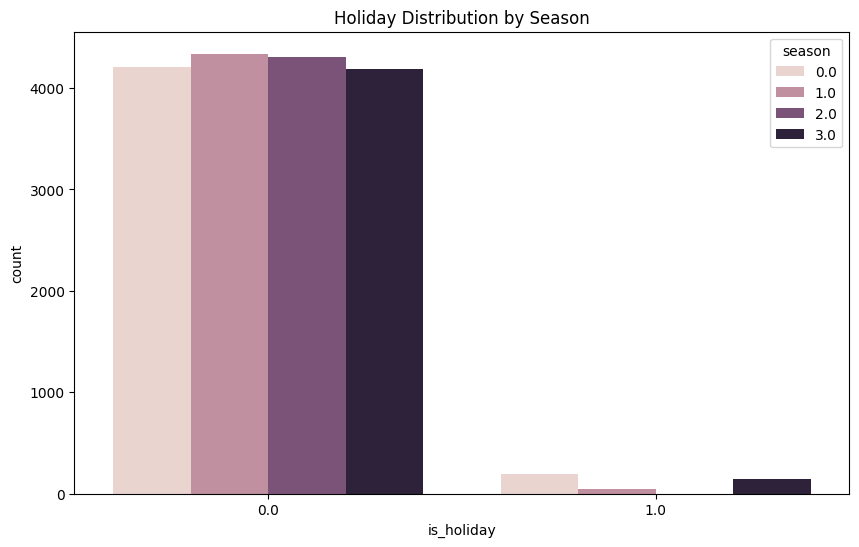

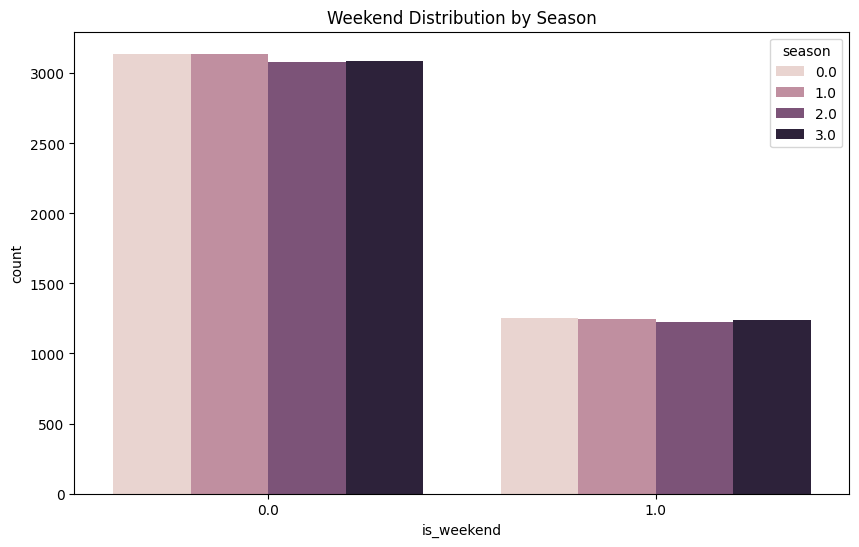

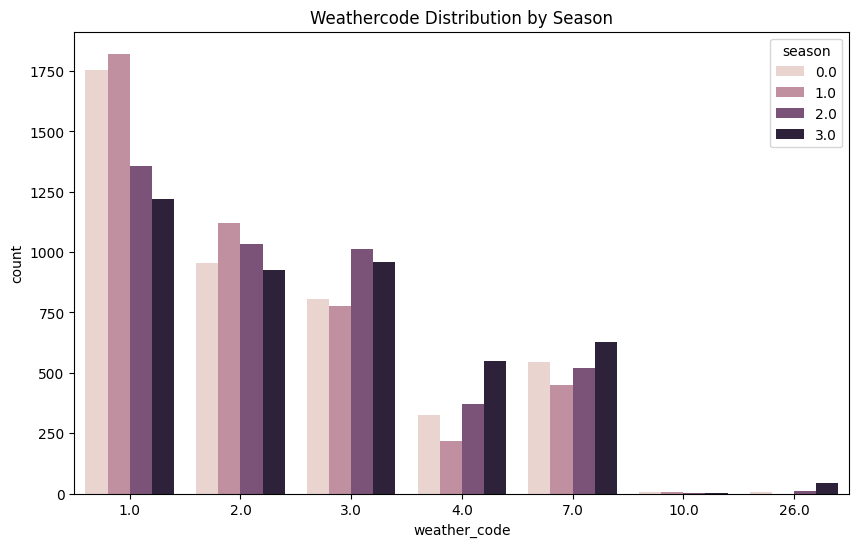

In [ ]:
# prompt:  PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON SEASON/HOLIDAY/WEEKEND/WEATHERCODE

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'season', 'holiday', 'weekend', and 'weathercode' are columns in your DataFrame 'data'

def plot_feature_distribution(feature_column, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature_column, hue='season', data=data)  # Replace 'season' with other categories as needed
    plt.title(title)
    plt.show()

plot_feature_distribution(data['is_holiday'], 'Holiday Distribution by Season')  # Replace 'holiday' with other feature columns
plot_feature_distribution(data['is_weekend'], 'Weekend Distribution by Season')
plot_feature_distribution(data['weather_code'], 'Weathercode Distribution by Season')


### TASK 04 - LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE & SET IT AS INDEX

In [ ]:
data = pd.DataFrame(data)

# Inspect data types
print("Data types before transformation:")
print(data.dtypes)

# Check if 'timestamp' column exists before conversion
if 'timestamp' in data.columns:
    # Convert 'timestamp' column to datetime if it exists
    data['timestamp'] = pd.to_datetime(data['timestamp'])

    # Set 'timestamp' as the index
    data.set_index('timestamp', inplace=True)

# Inspect data types after transformation
print("\nData types after transformation:")
print(data.dtypes)

# Print the transformed DataFrame
print("\nTransformed DataFrame:")
print(data)

Data types before transformation:
timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

Data types after transformation:
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

Transformed DataFrame:
                      cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                              
2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0          

### TASK 05 - MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.

In [ ]:
# prompt:  MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.

# Extract new features from the timestamp index
data['day_of_week'] = data.index.dayofweek
data['day_of_month'] = data.index.day
data['hour'] = data.index.hour
data['month'] = data.index.month
data['year'] = data.index.year

# Assuming 'season' column already exists and represents seasons numerically (e.g., 0, 1, 2, 3)
# If not, create the 'season' column based on your data's 'month' column
# Example mapping months to seasons (adjust as needed)
# data['season'] = data['month'] % 12 // 3

# Print the DataFrame with the new features
print("\nDataFrame with new features:")
data



DataFrame with new features:


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_week,day_of_month,hour,month,year
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,6,4,0,1,2015
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,6,4,1,1,2015
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,6,4,2,1,2015
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,6,4,3,1,2015
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,6,4,4,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,1,3,19,1,2017
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,1,3,20,1,2017
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,1,3,21,1,2017


### TASK 06 - VISUALIZING THE CORRELATION WITH A HEATMAP

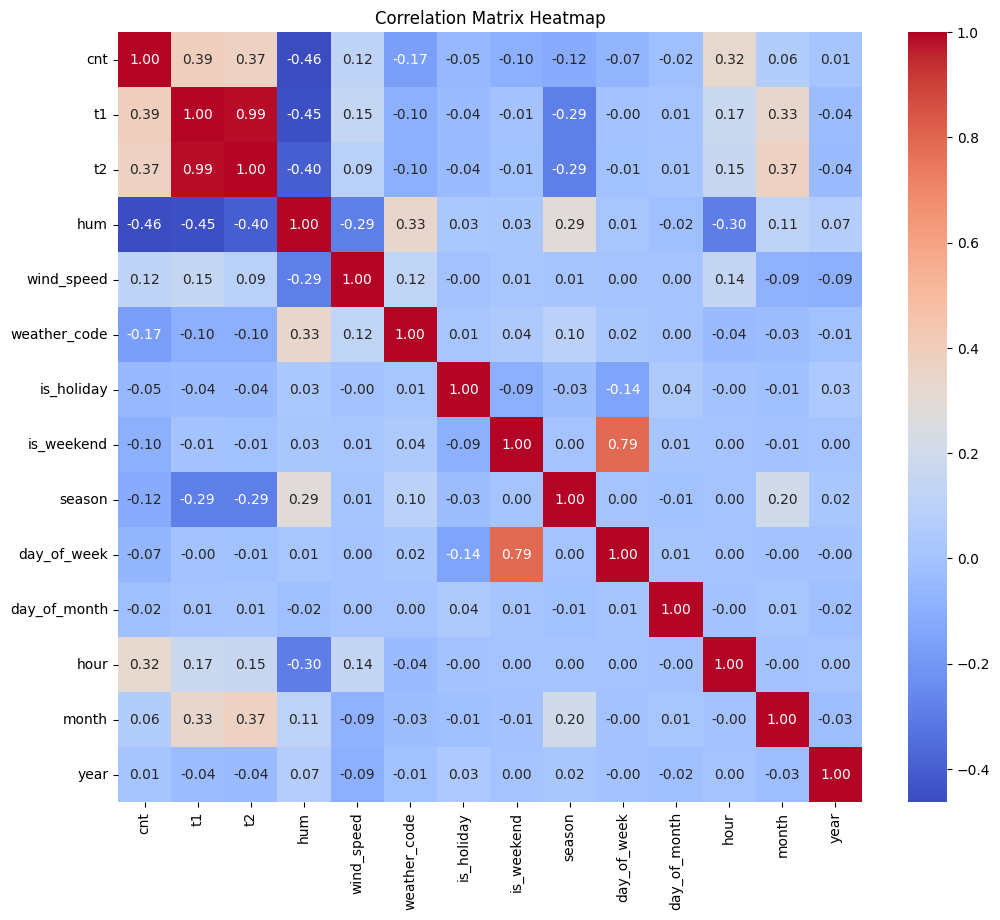

In [ ]:
# prompt:  VISUALIZING THE CORRELATION WITH A HEATMAP

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


### TASK 07 - VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLO

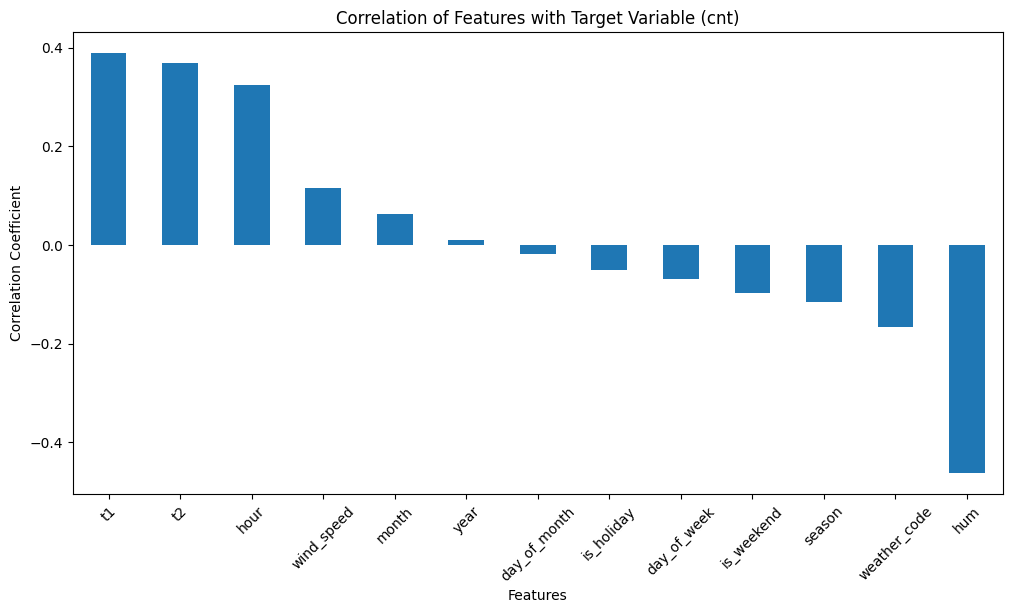

In [ ]:
# prompt: VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLO

# Assuming 'cnt' is your target variable
plt.figure(figsize=(12, 6))
data.corr()['cnt'].sort_values(ascending=False).drop('cnt').plot(kind='bar')
plt.title('Correlation of Features with Target Variable (cnt)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


### TASK 08 - PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT

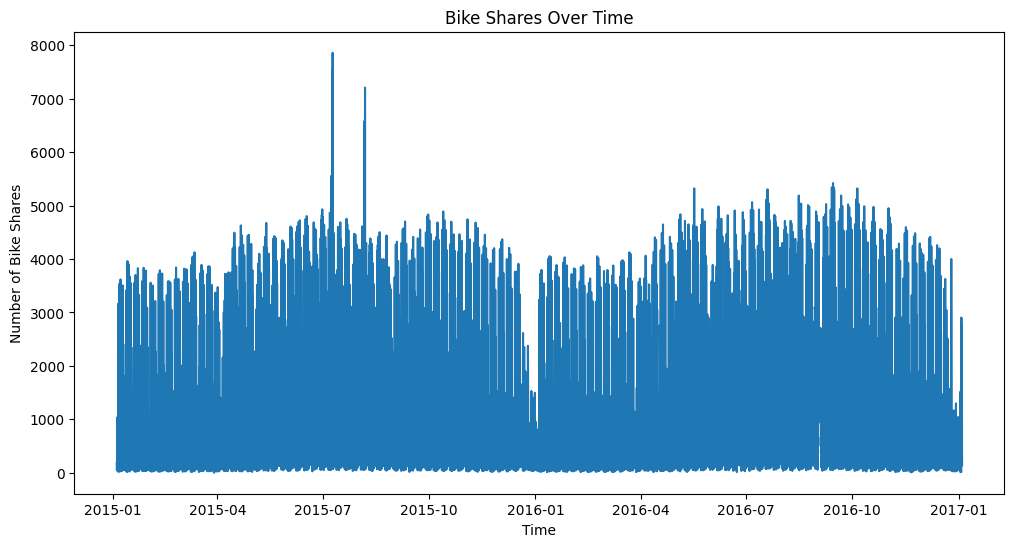

In [ ]:
# prompt:  PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['cnt'])
plt.title('Bike Shares Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Bike Shares')
plt.show()


### TASK 09 - PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)

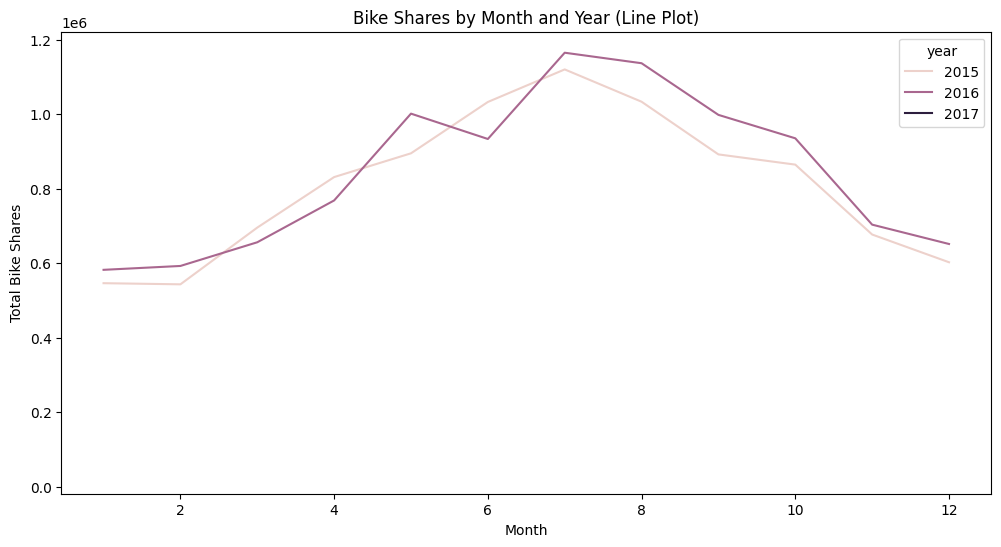

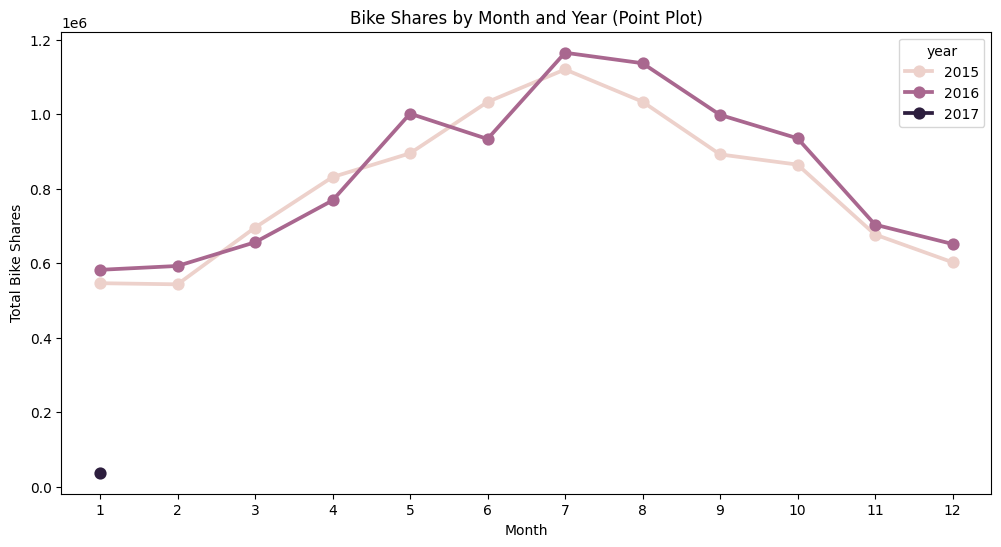

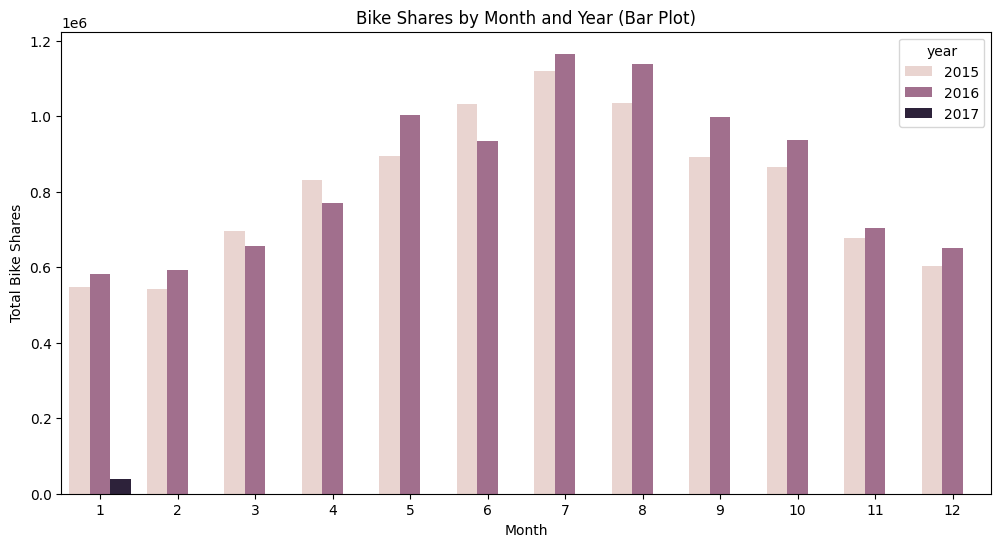

In [ ]:
# prompt: PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)

# Group data by month and year
monthly_data = data.groupby(['year', 'month'])['cnt'].sum().reset_index()

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='cnt', hue='year', data=monthly_data)
plt.title('Bike Shares by Month and Year (Line Plot)')
plt.xlabel('Month')
plt.ylabel('Total Bike Shares')
plt.show()

# Point plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='month', y='cnt', hue='year', data=monthly_data)
plt.title('Bike Shares by Month and Year (Point Plot)')
plt.xlabel('Month')
plt.ylabel('Total Bike Shares')
plt.show()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='cnt', hue='year', data=monthly_data)
plt.title('Bike Shares by Month and Year (Bar Plot)')
plt.xlabel('Month')
plt.ylabel('Total Bike Shares')
plt.show()


### TASK 10 - PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON)

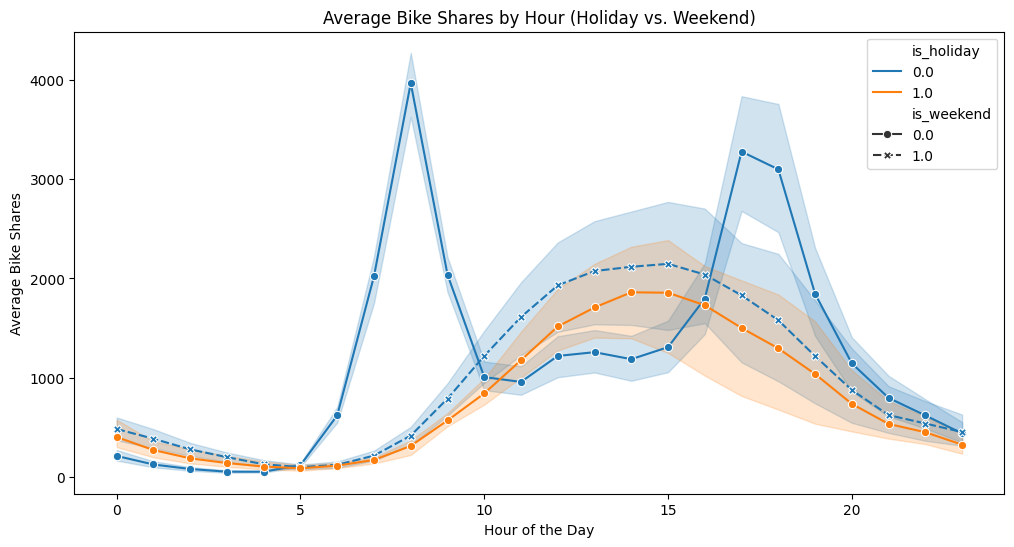

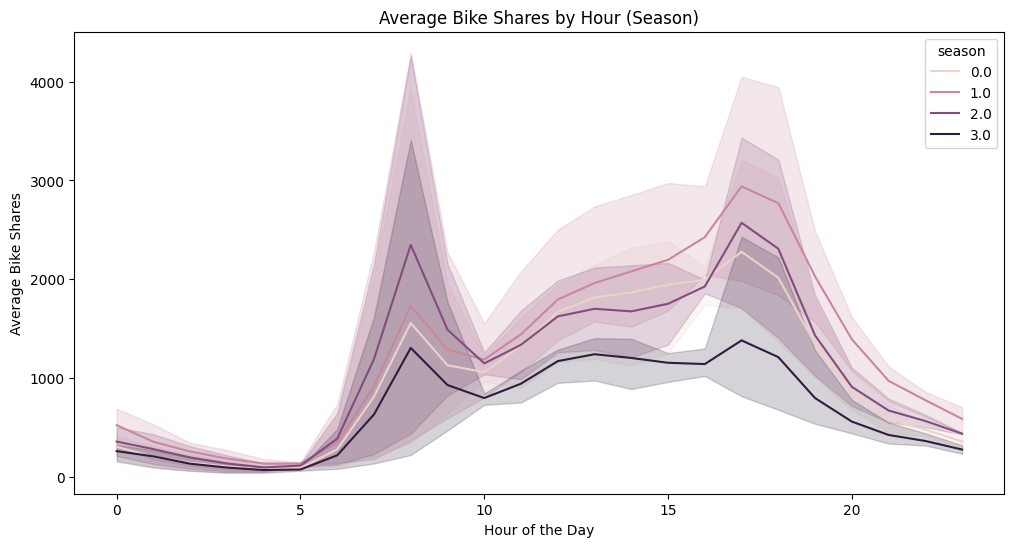

In [ ]:
# prompt: PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON)

# Group data by hour, holiday, weekend, and season
hourly_data = data.groupby(['hour', 'is_holiday', 'is_weekend', 'season'])['cnt'].mean().reset_index()

# Plotting bike shares by hour for different categories
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='cnt', hue='is_holiday', style='is_weekend', data=hourly_data, markers=True)
plt.title('Average Bike Shares by Hour (Holiday vs. Weekend)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Shares')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='cnt', hue='season', data=hourly_data, markers=True)
plt.title('Average Bike Shares by Hour (Season)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Shares')
plt.show()


### TASK 11 - PLOTTING BIKE SHARES BY DAY OF WEEK

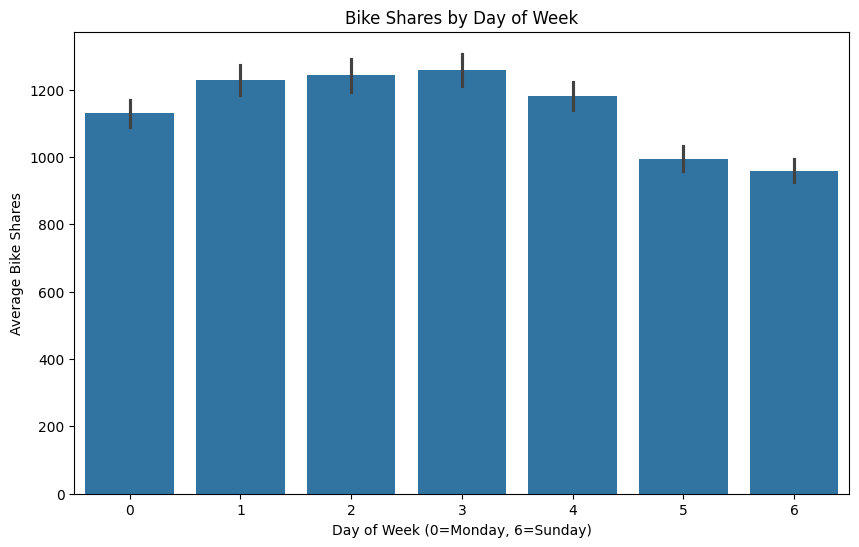

In [ ]:
# prompt: - PLOTTING BIKE SHARES BY DAY OF WEEK

# Plotting bike shares by day of week
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='cnt', data=data)
plt.title('Bike Shares by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Bike Shares')
plt.show()


### TASK 12 - PLOTTING BIKE SHARES BY DAY OF MONTH

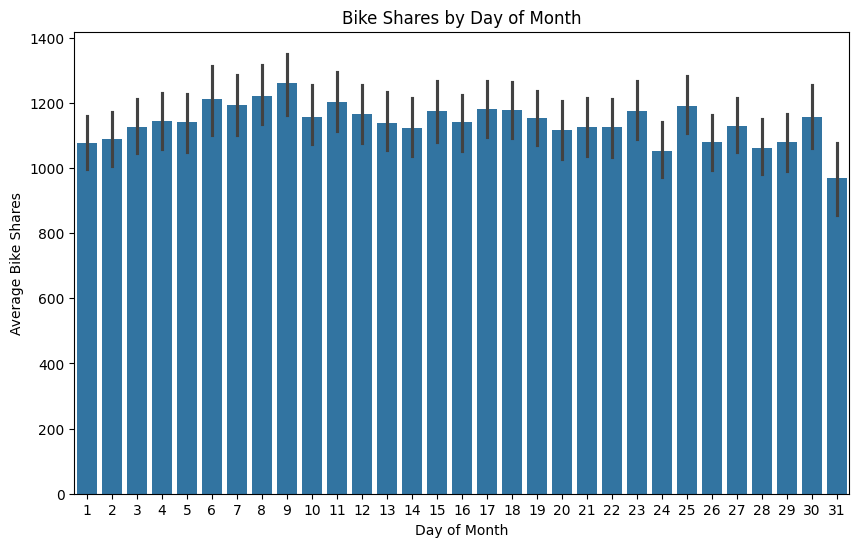

In [ ]:
# prompt: PLOTTING BIKE SHARES BY DAY OF MONTH

# Plotting bike shares by day of month
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_month', y='cnt', data=data)
plt.title('Bike Shares by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Average Bike Shares')
plt.show()


### TASK 13 - PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON

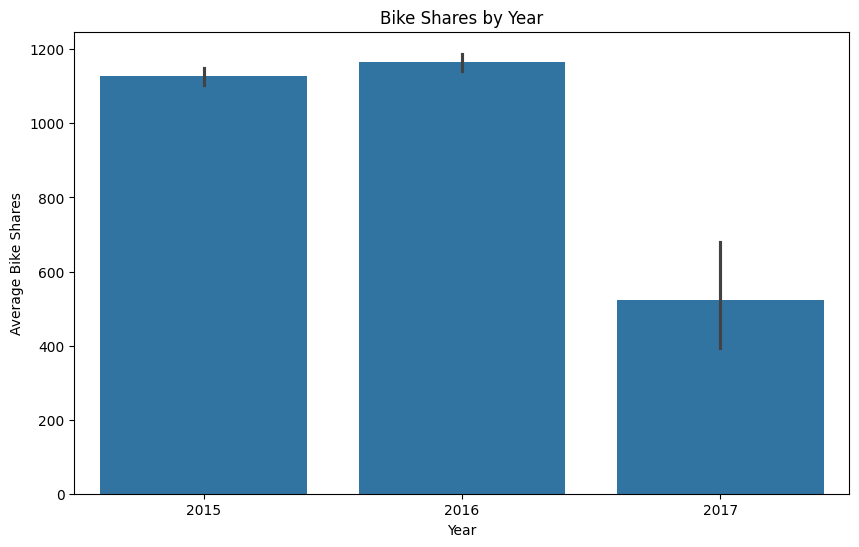

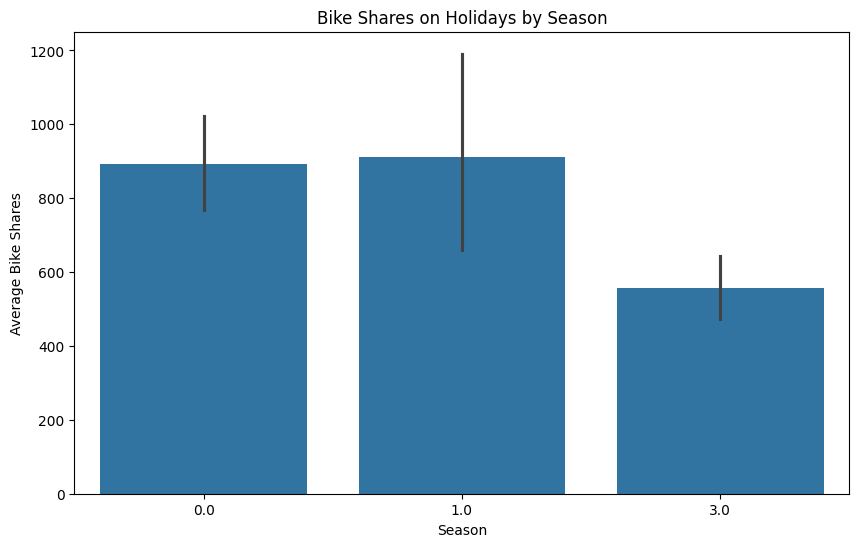

In [ ]:
# prompt: PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON

# ### TASK 13 - PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON

# Plotting bike shares by year
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='cnt', data=data)
plt.title('Bike Shares by Year')
plt.xlabel('Year')
plt.ylabel('Average Bike Shares')
plt.show()

# Plotting bike shares on holidays by season
holiday_data = data[data['is_holiday'] == 1]
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=holiday_data)
plt.title('Bike Shares on Holidays by Season')
plt.xlabel('Season')
plt.ylabel('Average Bike Shares')
plt.show()


### TASK 14 - VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT

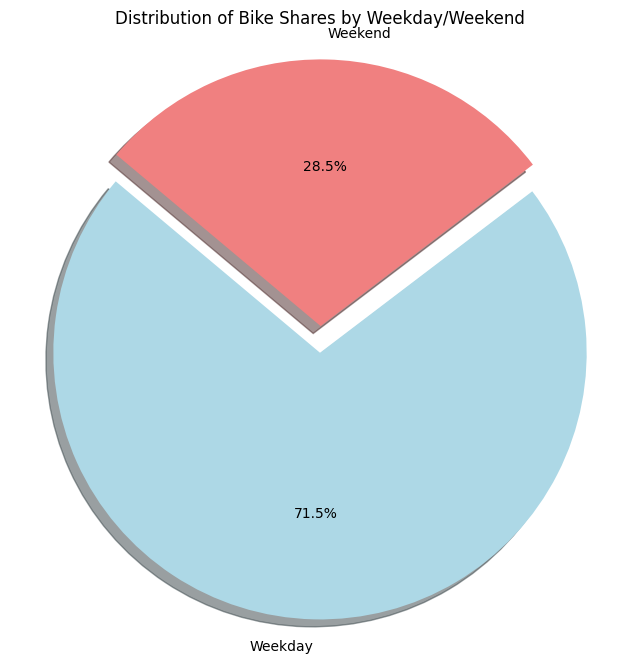

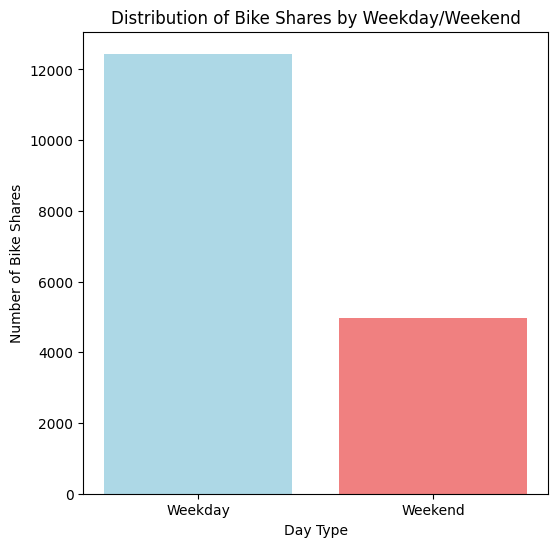

In [ ]:
# prompt: - VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT

# Plotting bike shares distribution by weekday/weekend using pie chart and bar plot

weekday_data = data[data['is_weekend'] == 0]
weekend_data = data[data['is_weekend'] == 1]

weekday_count = len(weekday_data)
weekend_count = len(weekend_data)

# Pie chart
labels = ['Weekday', 'Weekend']
sizes = [weekday_count, weekend_count]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Bike Shares by Weekday/Weekend')
plt.show()

# Bar plot
plt.figure(figsize=(6, 6))
plt.bar(labels, sizes, color=colors)
plt.xlabel("Day Type")
plt.ylabel("Number of Bike Shares")
plt.title("Distribution of Bike Shares by Weekday/Weekend")
plt.show()


### TASK 15 - PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON

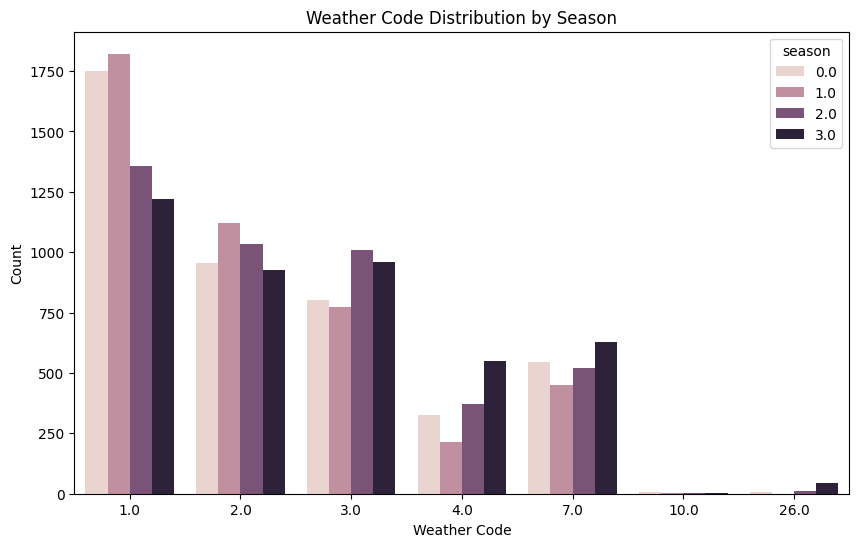

In [ ]:
# prompt:  PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON

# Plotting the distribution of weather code by season
plt.figure(figsize=(10, 6))
sns.countplot(x='weather_code', hue='season', data=data)
plt.title('Weather Code Distribution by Season')
plt.xlabel('Weather Code')
plt.ylabel('Count')
plt.show()
